### Creating a Machine Learning model to determine the color of the wine

*Objective : Building a machine learning model to predict the color of red and white wines* 

In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [158]:
# Installing opendatasets library to download the dataset
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [159]:
import opendatasets as od

In [160]:
# Path to the dataset on kaggle website
dataset = r"https://www.kaggle.com/datasets/saigeethac/red-and-white-wine-quality-datasets?select=winequality-white.csv"

In [161]:
# Downloading the dataset
od.download(dataset)
#{"username":"nipungupta26","key":"b74150bcb6b0c11a90bd22630992ac26"}

Skipping, found downloaded files in "./red-and-white-wine-quality-datasets" (use force=True to force download)


In [162]:
# Directory of the downloaded datasets in local system
data_dir = r'red-and-white-wine-quality-datasets'

In [163]:
# Listing out the datasets
os.listdir(data_dir)

['winequality-red.csv', 'winequality-white.csv']

#### Reading the white and red wine datasets

In [164]:
white_wine_data_dir = r"winequality-white.csv"
red_wine_data_dir = r"winequality-red.csv"


df_white_wine = pd.read_csv(data_dir + '/' + white_wine_data_dir, sep=';')
df_red_wine = pd.read_csv(data_dir + '/' + red_wine_data_dir, sep=';')

Adding a **color** column to each dataset

In [165]:
df_white_wine['color'] = 'white'
df_red_wine['color'] = 'red'

In [166]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [167]:
df_white_wine.shape

(4898, 13)

There are a total of 4898 records and 13 columns in the white wine dataframe

In [168]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [169]:
df_red_wine.shape

(1599, 13)

There are a total of 1599 records and 13 columns in the red wine dataframe

Input variables (based on physicochemical tests):

 - fixed acidity
 - volatile acidity
 - citric acid
 - residual sugar
 - chlorides
 - free sulfur dioxide
 - total sulfur dioxide
 - density
 - pH
 - sulphates
 - alcohol
 - quality (score between 0 and 10)

*We will concatenate the dataframes of white and red wines*

In [170]:
df_wine = pd.concat([df_white_wine, df_red_wine])

In [171]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


During the training phase, the ML model should know only about the training data. But if the model gets to know about the test data during the training phase, then this is called data leakage.

So we should perform splitting of the dataset before applying feature engineering. After splitting, we will first apply feature engineering for the training data and then apply it on to the test data. This will help to reduce data leakage and overfitting.

But presence of duplicates can also cause data leakage. Therefore, we will first remove the duplicate records from the dataset and then perform train test split

#### Identifying and removing duplicate rows in the dataset

In [172]:
df_wine.duplicated().sum()

1177

In [173]:
#Removing the duplicates but retaining only the first instance of the duplicate row
df_wine = df_wine.drop_duplicates(keep='first')

In [174]:
df_wine.duplicated().sum()

0

The indices of the dataframe will have to be reset from train test split

In [175]:
df_wine.reset_index(inplace = True, drop = True)

In [176]:
df_wine.shape

(5320, 13)

The red and white wine dataframes have been concatenated

#### Description of the dataset

In [177]:
df_wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5320.0,7.215179,1.319671,3.80000,6.4000,7.00000,7.70000,15.90000
volatile acidity,5320.0,0.344130,0.168248,0.08000,0.2300,0.30000,0.41000,1.58000
citric acid,5320.0,0.318494,0.147157,0.00000,0.2400,0.31000,0.40000,1.66000
residual sugar,5320.0,5.048477,4.500180,0.60000,1.8000,2.70000,7.50000,65.80000
chlorides,5320.0,0.056690,0.036863,0.00900,0.0380,0.04700,0.06600,0.61100
free sulfur dioxide,5320.0,30.036654,17.805045,1.00000,16.0000,28.00000,41.00000,289.00000
total sulfur dioxide,5320.0,114.109023,56.774223,6.00000,74.0000,116.00000,153.25000,440.00000
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72000,3.1100,3.21000,3.33000,4.01000
sulphates,5320.0,0.533357,0.149743,0.22000,0.4300,0.51000,0.60000,2.00000


#### Retrieving information about the dataset

In [178]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


The dataframe has 6497 rows and 13 columns

#### Unique colors in the dataset

In [179]:
print(df_wine['color'].unique())

['white' 'red']


In [180]:
print("Value count for feature color")
print(df_wine['color'].value_counts())

Value count for feature color
white    3961
red      1359
Name: color, dtype: int64


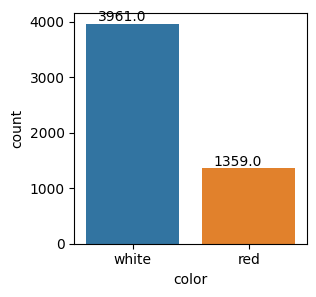

In [181]:
plt.figure(figsize=(3,3))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'color', data=df_wine)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

Pie chart showing **wine color** distribution

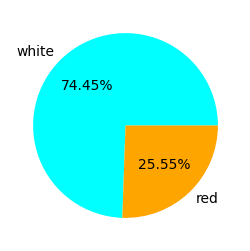

In [182]:
plt.figure(figsize=(3,3))
plt.pie(df_wine['color'].value_counts(), labels=df_wine['color'].unique(), autopct='%0.2f%%', colors = ['cyan', 'orange'])
plt.show()

The data is heavily imbalanced and unevenly distributed. There are much more records for **white** wines than for **red** wines

Analysing the **quality** column

In [183]:
print(df_wine['quality'].unique())

[6 5 7 8 4 3 9]


In [184]:
print("Value count for feature color")
print(df_wine['quality'].value_counts())

Value count for feature color
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64


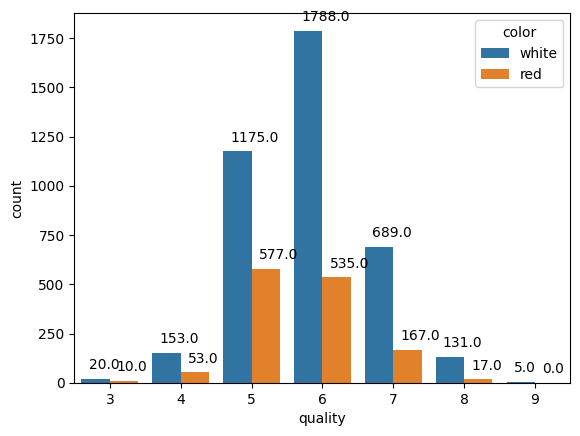

In [185]:
plt.ticklabel_format(style='plain')
ax = sns.countplot(x='quality', data=df_wine, hue='color')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

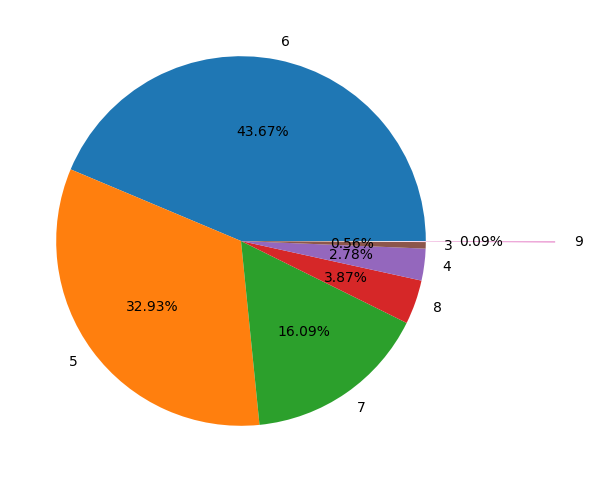

In [186]:
plt.figure(figsize=(6,6))
plt.pie(df_wine['quality'].value_counts(), labels=df_wine['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

Wines with **quality** as 6 are the maximum in number whereas wines with **quality** as **3**, **4**, and **9** are very minimal

#### Splitting the dataset into training and testing datasets

Separating the independent variables and the dependent variable

In [187]:
X = df_wine.drop(columns=["color"], axis=1)
Y = df_wine.color

In [188]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42, shuffle=True)

In [189]:
X_train.shape

(4522, 12)

In [190]:
X_test.shape

(798, 12)

In [191]:
y_train.shape

(4522,)

In [192]:
y_test.shape

(798,)

In [193]:
df_train = X_train.join(y_train, how='inner')

In [194]:
df_test = X_test.join(y_test, how='inner')

In [195]:
df_train.reset_index(inplace = True, drop = True)

In [196]:
df_test.reset_index(inplace = True, drop = True)

## Data Preprocessing and cleaning

#### Checking if there is any missing value in the dataset

In [197]:
df_train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We observe there are no missing values in the dataset*

Extracting the continuous features from the data

In [198]:
continuous_features = [feature for feature in df_train.select_dtypes(np.number).columns if feature not in ['quality', 'color']]

In [199]:
continuous_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

## Plotting Boxplots to identify Univariate outliers

In [200]:
def create_boxplots(dataset, feature_list, target):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.boxplot(x=dataset[target], y=dataset[feature], data=dataset, hue=target, color='orange')
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [201]:
#create_boxplots(df_train, continuous_features, 'color')

In [202]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
        lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
        upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
        dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
        dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

In [203]:
remove_outliers(df_train, continuous_features)

In [204]:
#create_boxplots(df_train, continuous_features, 'color')

From the boxplots, it can be observed that all the continuous features have univariate outliers

#### Checking for skewness

**Skewness scores to determine skewness in the column**

In [205]:
from scipy.stats import skew

In [206]:
def skewness_score(dataset, feature_list):
    variables = []
    skew_scores = []
    for feature in feature_list:
        variables.append(feature)
        skew_scores.append(skew(dataset[feature]))
        skew_dict = {'Feature': variables, 'Skewness Score': skew_scores}
        skewness_score = pd.DataFrame(skew_dict)
    return skewness_score

In [207]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score
0,fixed acidity,0.650615
1,volatile acidity,0.927973
2,citric acid,-0.004484
3,residual sugar,1.151167
4,chlorides,0.987667
5,free sulfur dioxide,0.541640
6,total sulfur dioxide,-0.003064
7,density,0.022730
8,pH,0.273356
9,sulphates,0.613810


## Plotting histograms and distplots to check the distributions of continuous variables

In [208]:
def create_histograms_distplots(dataset, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.ticklabel_format(style='plain')
        plt.hist(dataset[feature].dropna())
        plt.xlabel(feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        plt.ticklabel_format(style='plain')
        sns.distplot(dataset[feature])
        plt.xlabel(feature)
        plt.show()

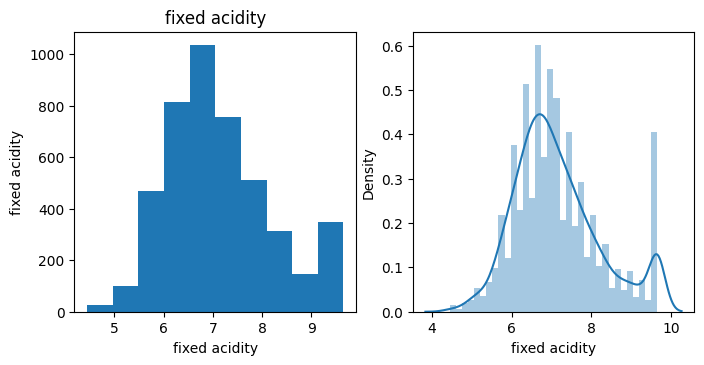

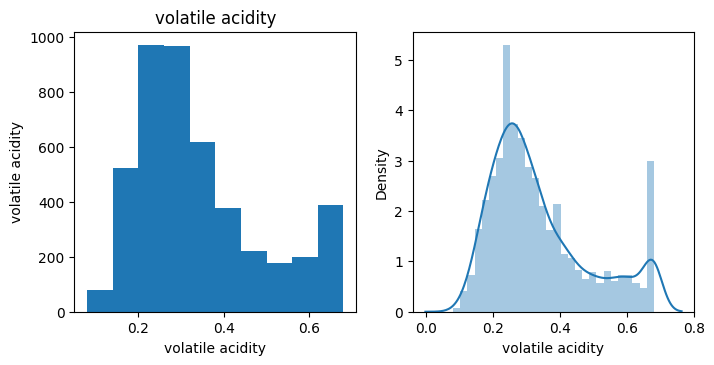

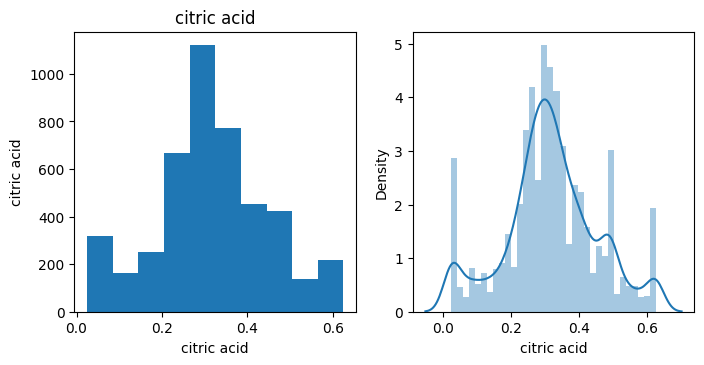

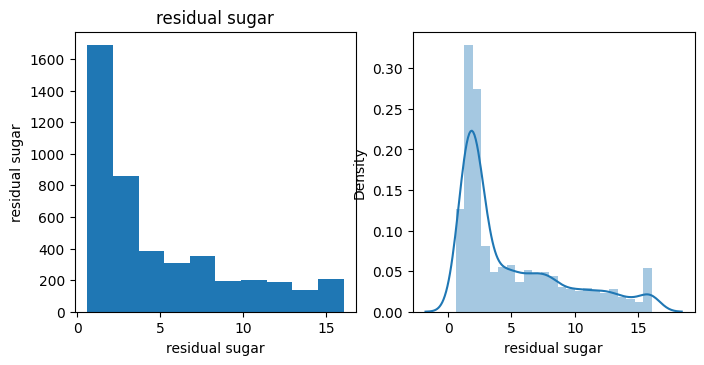

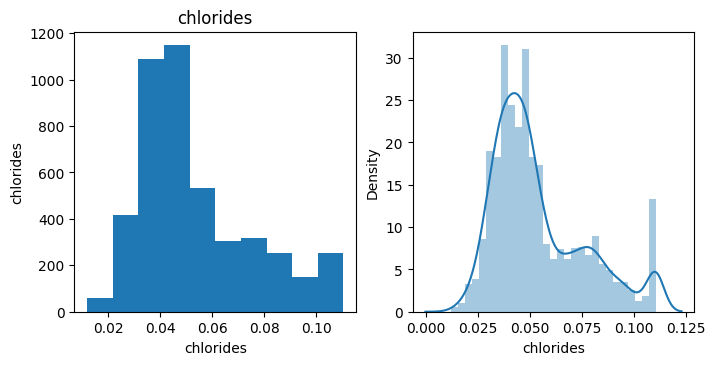

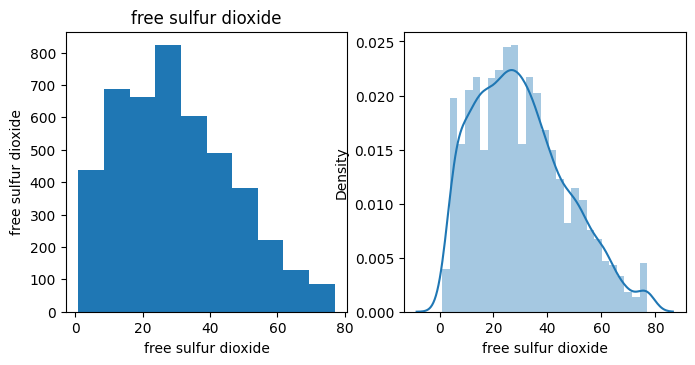

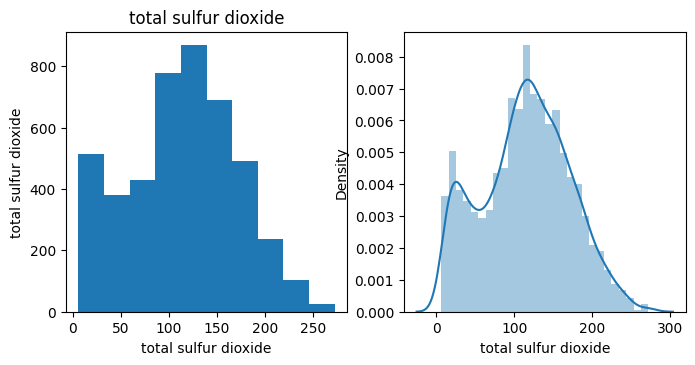

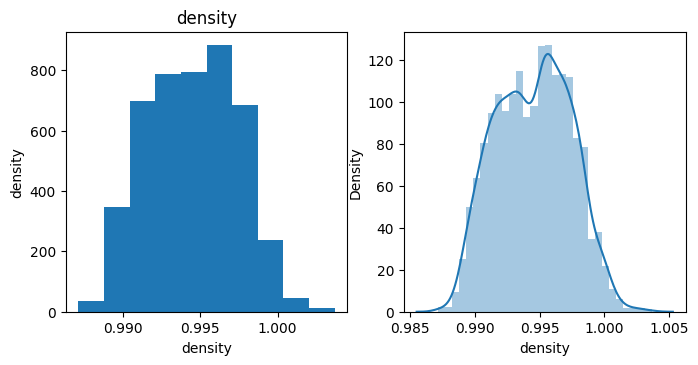

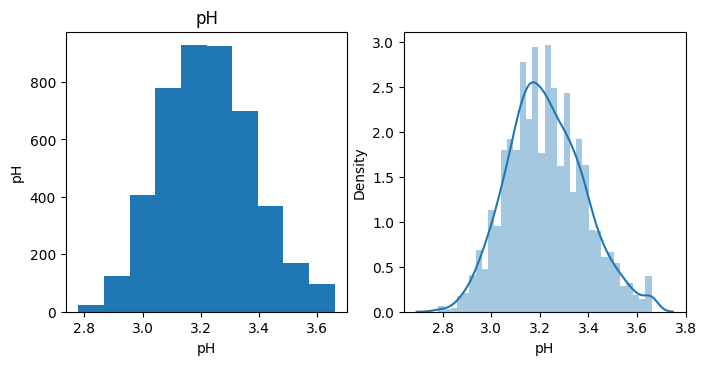

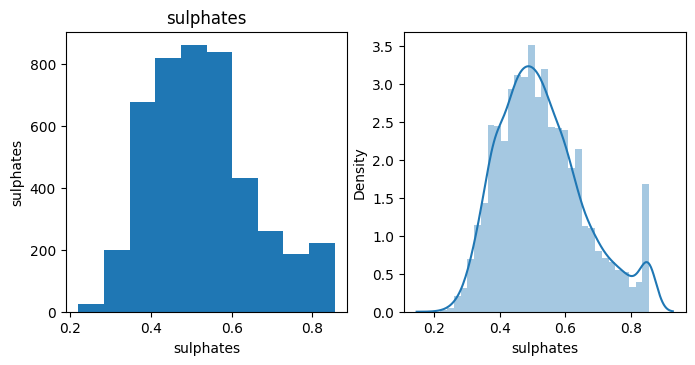

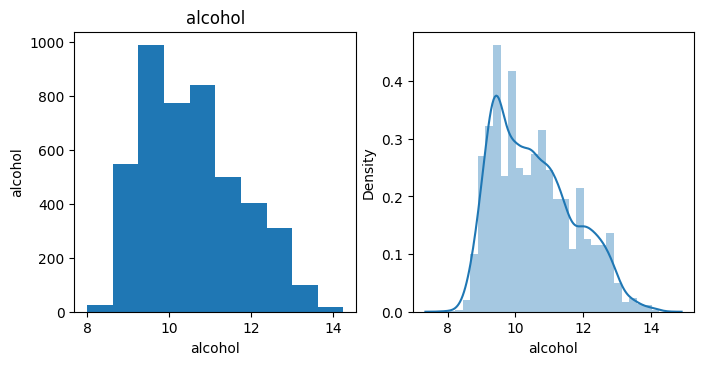

In [209]:
create_histograms_distplots(df_train, continuous_features)

From the distplots, it can be observed that the feature columns **volatile acidity**, **residual sugar**, **free sulfur dioxide**, **sulphates**, **chlorides** and **alcohol** are considerably skewed. We will remove skewness by performing square root transformation

In [210]:
df_train['fixed acidity'] = np.sqrt(df_train['fixed acidity'])
#sns.distplot(df_train['fixed acidity'])

In [211]:
df_train['volatile acidity'] = np.sqrt(df_train['volatile acidity'])
#sns.distplot(df_train['volatile acidity'])

In [212]:
df_train['residual sugar'] = np.sqrt(df_train['residual sugar'])
#sns.distplot(df_train['residual sugar'])

In [213]:
df_train['chlorides'] = np.sqrt(df_train['chlorides'])
#sns.distplot(df_train['chlorides'])

In [214]:
df_train['free sulfur dioxide'] = np.sqrt(df_train['free sulfur dioxide'])
#sns.distplot(df_train['free sulfur dioxide'].dropna())

In [215]:
df_train['sulphates'] = np.sqrt(df_train['sulphates'])
#sns.distplot(df_train['sulphates'].dropna())

In [216]:
df_train['alcohol'] = np.sqrt(df_train['alcohol'])
#sns.distplot(df_train['alcohol'].dropna())

In [217]:
skewness_score(df_train, continuous_features)

,Feature,Skewness Score
0,fixed acidity,0.461031
1,volatile acidity,0.574892
2,citric acid,-0.004484
3,residual sugar,0.734937
4,chlorides,0.618143
5,free sulfur dioxide,-0.081275
6,total sulfur dioxide,-0.003064
7,density,0.022730
8,pH,0.273356
9,sulphates,0.327175


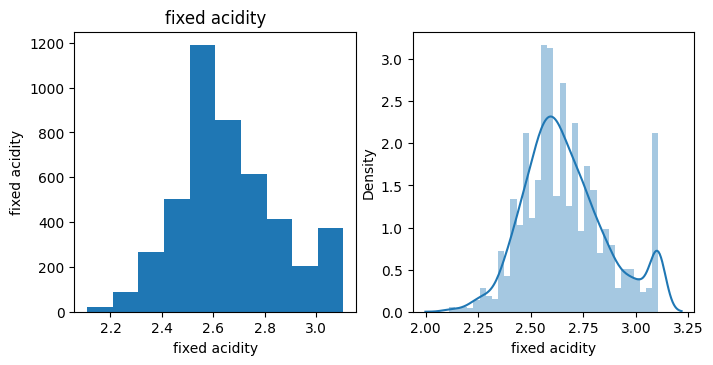

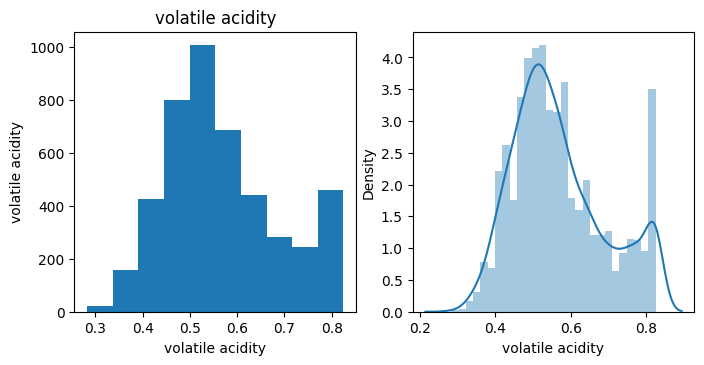

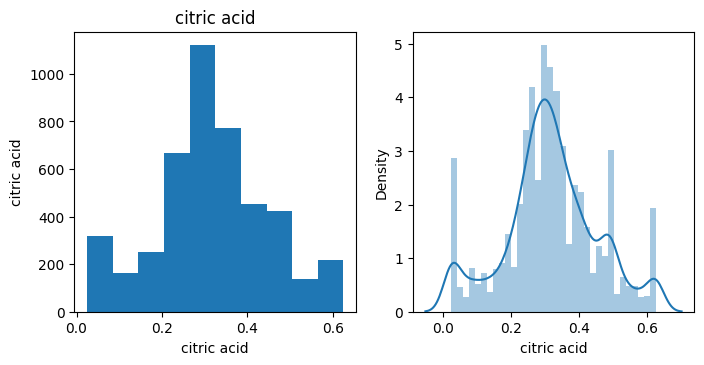

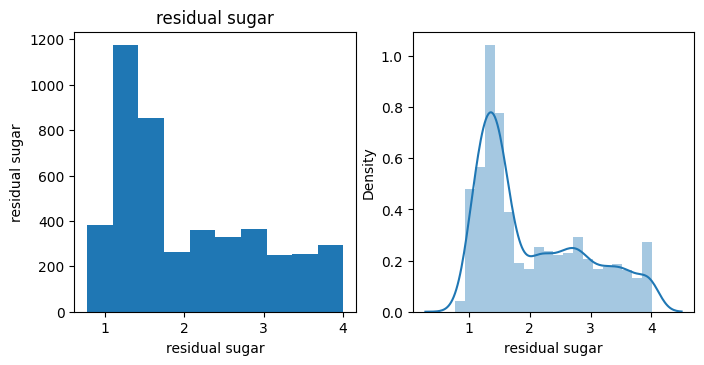

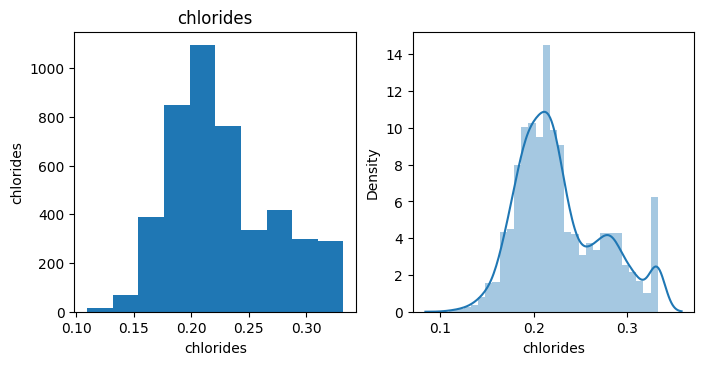

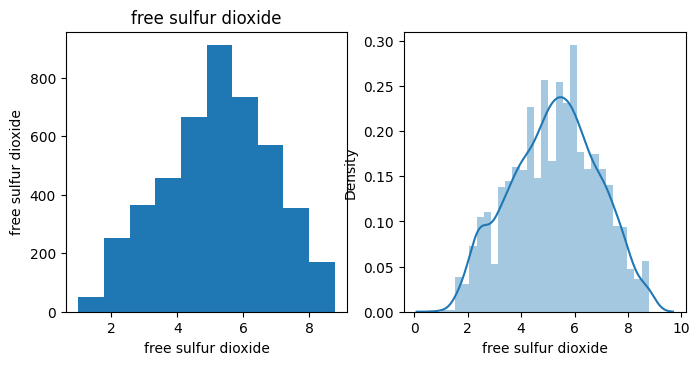

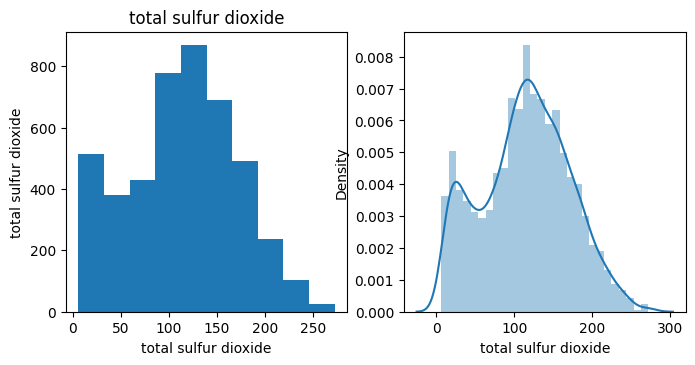

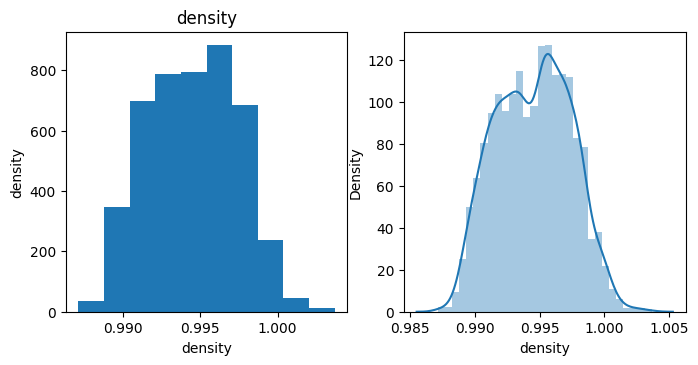

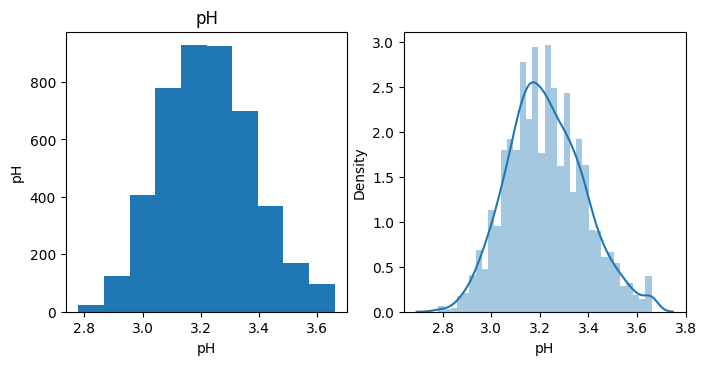

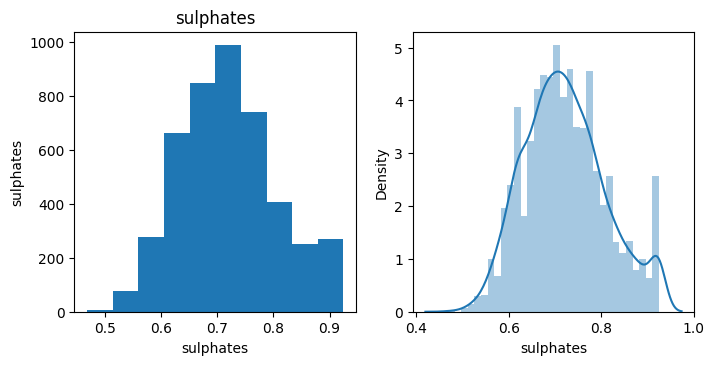

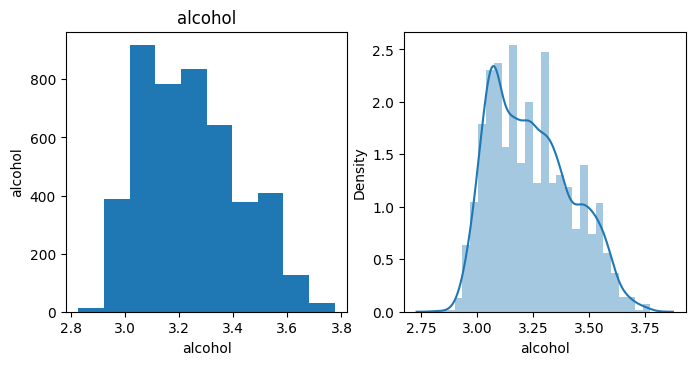

In [218]:
create_histograms_distplots(df_train, continuous_features)

## Plotting scatterplot to identify any multivariate outliers

In [219]:
def create_scatterplots(dataset, feature_list):
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.lmplot(x=feature, y=bivariate_feature, data=dataset, fit_reg=False, hue='color')

In [220]:
#create_scatterplots(dataset=df_train, feature_list=continuous_features)

In [221]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 2.9) & (df_train['volatile acidity'] < 0.35)].index)

In [222]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 2.6) & (df_train['volatile acidity'] < 0.3)].index)

In [223]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['residual sugar'] > 3.2)].index)

In [224]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.3) & (df_train['residual sugar'] > 3.7)].index)

In [225]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.31) & (df_train['chlorides'] > 0.33)].index)

In [226]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3) & (df_train['free sulfur dioxide'] < 1.2)].index)

In [227]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3) & (df_train['free sulfur dioxide'] > 8.5)].index)

In [228]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['total sulfur dioxide'] < 11)].index)

In [229]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3) & (df_train['total sulfur dioxide'] > 270)].index)

In [230]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['density'] > 0.9950)].index)

In [231]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.15) & (df_train['sulphates'] > 0.9)].index)

In [232]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] > 3.1) & (df_train['alcohol'] > 3.7)].index)

In [233]:
df_train = df_train.drop(df_train[(df_train['fixed acidity'] < 2.2) & (df_train['alcohol'] < 2.9)].index)

In [234]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.75) & (df_train['chlorides'] < 0.15)].index)

In [235]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] > 0.5) & (df_train['volatile acidity'] < 0.6) & (df_train['density'] > 1.003)].index)

In [236]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.35) & (df_train['pH'] < 2.85)].index)

In [237]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.35) & (df_train['sulphates'] < 0.52)].index)

In [238]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.35) & (df_train['sulphates'] < 0.52)].index)

In [239]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.46) & (df_train['sulphates'] < 0.48)].index)

In [240]:
df_train = df_train.drop(df_train[(df_train['volatile acidity'] < 0.3) & (df_train['sulphates'] > 0.8)].index)

In [241]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.05) & (df_train['chlorides'] < 0.15)].index)

In [242]:
df_train = df_train.drop(df_train[(df_train['citric acid'] > 0.55) & (df_train['density'] > 1.0025)].index)

In [243]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.15) & (df_train['sulphates'] < 0.51)].index)

In [244]:
df_train = df_train.drop(df_train[(df_train['citric acid'] < 0.3) & (df_train['sulphates'] < 0.5)].index)

In [245]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 3.8) & (df_train['total sulfur dioxide'] < 50)].index)

In [246]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 3.7) & (df_train['pH'] < 2.8)].index)

In [247]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.15) & (df_train['fixed acidity'] < 2.25)].index)

In [248]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.27) & (df_train['total sulfur dioxide'] > 270)].index)

In [249]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.18) & (df_train['density'] > 1.002)].index)

In [250]:
df_train = df_train.drop(df_train[(df_train['chlorides'] < 0.13) & (df_train['pH'] < 2.9)].index)

In [251]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.33) & (df_train['pH'] > 3.6)].index)

In [252]:
df_train = df_train.drop(df_train[(df_train['chlorides'] > 0.33) & (df_train['pH'] < 2.8)].index)

In [253]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 8.5) & (df_train['density'] > 1.002)].index)

In [254]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] < 48) & (df_train['density'] > 1.003)].index)

In [255]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 270) & (df_train['density'] < 0.991)].index)

In [256]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 270) & (df_train['pH'] > 3.4)].index)

In [257]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] < 45) & (df_train['pH'] < 2.8)].index)

In [258]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 240) & (df_train['sulphates'] > 0.85)].index)

In [259]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 270) & (df_train['sulphates'] < 0.65)].index)

In [260]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 270) & (df_train['alcohol'] > 3.4)].index)

In [261]:
df_train = df_train.drop(df_train[(df_train['total sulfur dioxide'] > 215) & (df_train['alcohol'] > 3.6)].index)

In [262]:
df_train = df_train.drop(df_train[(df_train['density'] < 0.988) & (df_train['sulphates'] > 0.9)].index)

In [263]:
df_train = df_train.drop(df_train[(df_train['density'] > 1) & (df_train['alcohol'] > 3.5)].index)

In [264]:
df_train = df_train.drop(df_train[(df_train['pH'] < 2.8) & (df_train['volatile acidity'] > 0.65)].index)

In [265]:
df_train = df_train.drop(df_train[(df_train['sulphates'] < 0.55) & (df_train['volatile acidity'] > 0.8)].index)

In [266]:
df_train = df_train.drop(df_train[(df_train['sulphates'] > 0.8) & (df_train['chlorides'] < 0.125)].index)

In [267]:
df_train = df_train.drop(df_train[(df_train['sulphates'] > 0.8) & (df_train['chlorides'] < 0.125)].index)

In [268]:
df_train = df_train.drop(df_train[(df_train['residual sugar'] > 1.5) & (df_train['chlorides'] < 0.11)].index)

In [269]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 4.5) & (df_train['density'] > 1.0025)].index)

In [270]:
df_train = df_train.drop(df_train[(df_train['free sulfur dioxide'] > 3.5) & (df_train['pH'] < 2.8)].index)

## Plotting Hexplot to check the concentration of data points

In [271]:
def create_jointplots(dataset, feature_list):
    plt.figure(figsize=(5,5))
    for feature in feature_list:
        for bivariate_feature in feature_list:
            if feature != bivariate_feature:
                sns.jointplot(x=feature, y=bivariate_feature, data=dataset, kind='hex')

In [272]:
#create_jointplots(df_wine, continuous_features)

Darker regions in the **hexplot** mean more concentration of data points in those regions

## Plotting FacetGrids

In [273]:
def create_FacetGrid(dataset, feature_list):
    for feature in feature_list:
        v = sns.FacetGrid(dataset, col='color', row='quality')
        v.map(plt.hist, feature)

In [274]:
#create_FacetGrid(df_wine, continuous_features)

## Creating Pivot table

In [275]:
pd.pivot_table(df_train, index='color', values=continuous_features, aggfunc=['median'])

median                                               \
        alcohol chlorides citric acid  density fixed acidity   
color                                                          
red    3.193744  0.281069        0.26  0.99670      2.810694   
white  3.230063  0.207364        0.32  0.99347      2.607681   

                                                                               \
      free sulfur dioxide    pH residual sugar sulphates total sulfur dioxide   
color                                                                           
red              3.741657  3.31       1.483240  0.787401                 38.0   
white            5.744563  3.18       2.167948  0.692820                134.0   

                        
      volatile acidity  
color                   
red           0.721110  
white         0.509902

It can be observed that **white** wine has a much higher median concentration of **free sulfur dioxide** and **total sulfur dioxide** than **red** wine

In [276]:
pd.pivot_table(df_train, index='quality', values=continuous_features, aggfunc='median')

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,3.166206,0.241848,0.345,0.99590,2.747711,3.936492,3.245,1.663574,0.717627,61.5,0.643912
4,3.178050,0.228035,0.265,0.99510,2.636268,3.741657,3.235,1.483240,0.707107,102.0,0.616441
5,3.098387,0.230217,0.300,0.99594,2.664583,5.196152,3.200,1.673320,0.714143,125.0,0.574456
6,3.240370,0.214476,0.310,0.99449,2.626785,5.385165,3.220,1.673320,0.721110,117.0,0.519615
7,3.391165,0.197484,0.320,0.99214,2.607681,5.385165,3.240,1.620167,0.721110,113.0,0.529150
8,3.492850,0.192354,0.330,0.99175,2.607681,5.656854,3.240,1.897367,0.700000,115.0,0.538516
9,3.549620,0.160491,0.350,0.99005,2.645684,5.381958,3.325,1.448727,0.670447,116.0,0.554951


The above pivot table shows the concentration of various constituents in wines of respective quality values

In [277]:
df_train.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'})

Count
quality color       
3       red        9
        white     15
4       red       45
        white    129
5       red      483
        white    979
6       red      457
        white   1508
7       red      135
        white    577
8       red       15
        white    108
9       white      4

<Axes: xlabel='quality,color'>

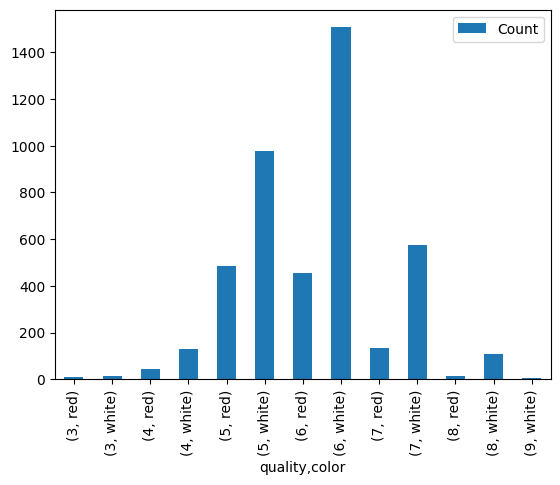

In [278]:
df_train.groupby(['quality', 'color'])[['color']].count().sort_values(['quality']).rename(columns={'color':'Count'}).plot(kind='bar')

The **white** wine with wuality **6** is the maximum in count wherea the **white** wines with quality **9** is minimum in count

## Plotting a Heatmap for correlation analysis

<Axes: >

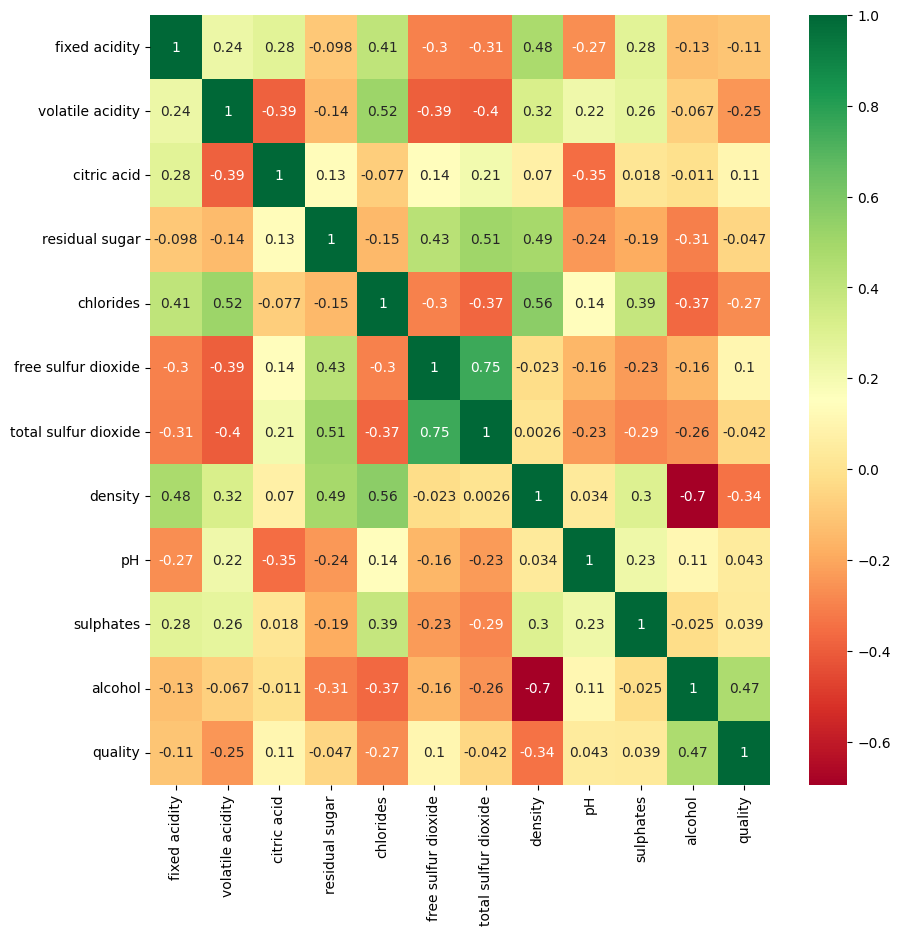

In [279]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")

The correlation analysis using heatmap shows values of pearson correlation coefficient for the respective combinations of the features. The pearson correlation coefficient varies from -1 to 1. The stronger the negative value, the more inversely related are the features. The stronger the positive value, the stronger the direct relationship between the features. A value of zero means the features are independent of each other.

The correlation analysis will have effect on the feature selection. The combination of features which are strongly and directly related to each other need to be considered. One of such features can be dropped as all of such features will have the same impact on the target feature.

## Feature Selection

**Feature Selection** is performed to retain only the important features and discard the irrelevant features

In [280]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [281]:
X = df_train.iloc[:,:-1]

In [282]:
X.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.683282,0.591608,0.250,2.366432,0.178885,4.795832,120.0,0.99334,2.93,0.812404,3.209361,7
1,2.213594,0.648074,0.025,1.449138,0.219089,4.000000,42.0,0.99154,3.66,0.860233,3.741657,7


In [283]:
Y = df_train.iloc[:,-1]

In [284]:
Y.head(2)

0    white
1      red
Name: color, dtype: object

In [285]:
bestfeatures = SelectKBest(score_func = chi2)

In [286]:
fit = bestfeatures.fit(X, Y)

In [287]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [288]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)

In [289]:
featureScores.columns = ['Features', 'Score']

In [290]:
featureScores.sort_values(by='Score', ascending=False)

,Features,Score
6,total sulfur dioxide,61944.540544
5,free sulfur dioxide,602.416608
3,residual sugar,185.797673
1,volatile acidity,51.255257
4,chlorides,20.135279
0,fixed acidity,14.625817
9,sulphates,12.017981
2,citric acid,11.560646
11,quality,8.215872
8,pH,3.326501


The features that have high scores are more correlated with the target variable.

The features **density**, **alcohol**, **pH** and **quality** do not contribute much to the prediction of the target variable

## Feature Importance

In [291]:
from sklearn.ensemble import ExtraTreesClassifier

In [292]:
model = ExtraTreesClassifier()

In [293]:
model.fit(X,Y)

ExtraTreesClassifier()

In [294]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

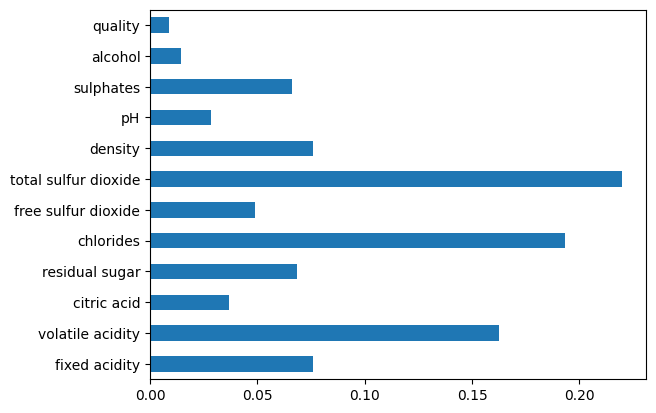

In [295]:
feat_importances.plot(kind='barh')
plt.show()

The above barplot displays the feature importance scores. From the above barplot, it can be observed that the features **quality**, **alcohol** and **pH** are not so important features and thus can be removed from the dataset

In [296]:
df_train = df_train.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [297]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,2.683282,0.591608,0.250,2.366432,0.178885,4.795832,120.0,0.99334,0.812404,white
1,2.213594,0.648074,0.025,1.449138,0.219089,4.000000,42.0,0.99154,0.860233,red
2,3.106445,0.655744,0.330,1.643168,0.308221,5.291503,89.0,0.99840,0.824621,red
3,2.529822,0.469042,0.560,3.807887,0.234521,5.196152,159.0,0.99800,0.632456,white
4,2.828427,0.469042,0.320,3.224903,0.207364,7.937254,201.0,0.99700,0.728011,white


The features **quality**, **alcohol** and **pH** have been removed from the training and testing dataframes

## Handling imbalance in the data

In [298]:
from collections import Counter

In [299]:
print(df_train['color'].value_counts())

white    3320
red      1144
Name: color, dtype: int64


It can be observed that there is a huge imbalance in the target column **color** in the dataset

In [300]:
# Installing imblearn library
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [301]:
# Importing SMOTETomek

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [302]:
# Initializing SMOTETomek
os = SMOTE(sampling_strategy=1)

In [303]:
X = df_train.iloc[:,:-1]

In [304]:
Y = df_train.iloc[:,-1]

In [305]:
X_train, Y_train = os.fit_resample(X, Y)

In [306]:
print("Number of classes after fit {}".format(Counter(Y_train)))

Number of classes after fit Counter({'white': 3320, 'red': 3320})


In [307]:
df_train = X_train.join(Y_train, how='inner')

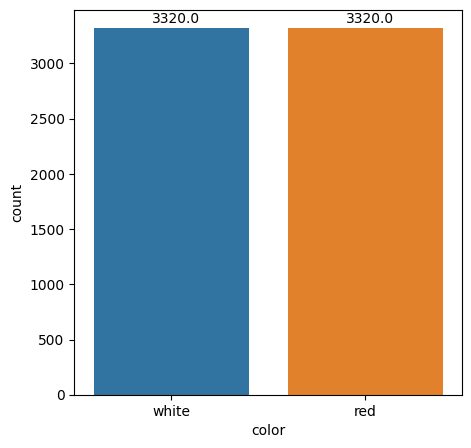

In [310]:
plt.figure(figsize=(5,5))
plt.ticklabel_format(style='plain')
ax = sns.countplot(x= 'color', data=df_train)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [311]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,2.683282,0.591608,0.250,2.366432,0.178885,4.795832,120.0,0.99334,0.812404,white
1,2.213594,0.648074,0.025,1.449138,0.219089,4.000000,42.0,0.99154,0.860233,red
2,3.106445,0.655744,0.330,1.643168,0.308221,5.291503,89.0,0.99840,0.824621,red
3,2.529822,0.469042,0.560,3.807887,0.234521,5.196152,159.0,0.99800,0.632456,white
4,2.828427,0.469042,0.320,3.224903,0.207364,7.937254,201.0,0.99700,0.728011,white


#### One hot encoding of color feature

In [312]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [313]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,2.683282,0.591608,0.250,2.366432,0.178885,4.795832,120.0,0.99334,0.812404,1
1,2.213594,0.648074,0.025,1.449138,0.219089,4.000000,42.0,0.99154,0.860233,0
2,3.106445,0.655744,0.330,1.643168,0.308221,5.291503,89.0,0.99840,0.824621,0
3,2.529822,0.469042,0.560,3.807887,0.234521,5.196152,159.0,0.99800,0.632456,1
4,2.828427,0.469042,0.320,3.224903,0.207364,7.937254,201.0,0.99700,0.728011,1


The target variable **color** has been one hot encoded

In [ ]:
#X_train = df_train.iloc[:,:-1]

In [ ]:
#X_train.head()

In [ ]:
#Y_train = df_train.iloc[:,-1]

In [ ]:
#Y_train.head()

In [ ]:
#Y_train.shape

### Feature Scaling

In [314]:
from sklearn.preprocessing import MinMaxScaler

In [315]:
#Instantiating StandardScaler
minmax_scaler  = MinMaxScaler()

In [316]:
#Fitting the dataframe X_train onto the standard scaler
#df_train_continuous_features_transformed = minmax_scaler.fit_transform(X_train)
df_train_continuous_features_transformed = minmax_scaler.fit_transform(df_train)

In [317]:
df_train_continuous_features_transformed

array([[0.57553891, 0.56288742, 0.375     , ..., 0.40219496, 0.73565275,
        1.        ],
       [0.10441128, 0.66881294, 0.        , ..., 0.28599096, 0.84828038,
        0.        ],
       [1.        , 0.68320079, 0.50833333, ..., 0.72885733, 0.76442217,
        0.        ],
       ...,
       [0.90743449, 0.7767836 , 0.45730407, ..., 0.67454353, 0.49433875,
        0.        ],
       [0.77530103, 0.57237959, 0.64807344, ..., 0.56387922, 0.7157787 ,
        0.        ],
       [0.20142247, 0.78360383, 0.34660441, ..., 0.33267972, 0.76941186,
        0.        ]])

In [318]:
#df_train_continuous_features_scaled = pd.DataFrame({'fixed acidity': df_train_continuous_features_transformed[:, 0], 'volatile acidity': df_train_continuous_features_transformed[:, 1], 'citric acid': df_train_continuous_features_transformed[:, 2], 'residual sugar': df_train_continuous_features_transformed[:, 3], 'chlorides': df_train_continuous_features_transformed[:, 4], 'free sulfur dioxide': df_train_continuous_features_transformed[:, 5], 'total sulfur dioxide': df_train_continuous_features_transformed[:, 6], 'density': df_train_continuous_features_transformed[:, 7], 'sulphates': df_train_continuous_features_transformed[:, 8],})
df_train_continuous_features_scaled = pd.DataFrame(df_train_continuous_features_transformed, columns=df_train.columns)

In [319]:
df_train_continuous_features_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,0.575539,0.562887,0.375000,0.492577,0.282885,0.488212,0.427767,0.402195,0.735653,1.0
1,0.104411,0.668813,0.000000,0.208730,0.470670,0.385854,0.135084,0.285991,0.848280,0.0
2,1.000000,0.683201,0.508333,0.268770,0.886990,0.551964,0.311445,0.728857,0.764422,0.0
3,0.421609,0.332963,0.891667,0.938620,0.542749,0.539701,0.574109,0.703034,0.311908,1.0
4,0.721130,0.332963,0.491667,0.758222,0.415906,0.892255,0.731707,0.638476,0.536923,1.0


Data Preprocessing and cleaning on the test dataframe

In [320]:
df_test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

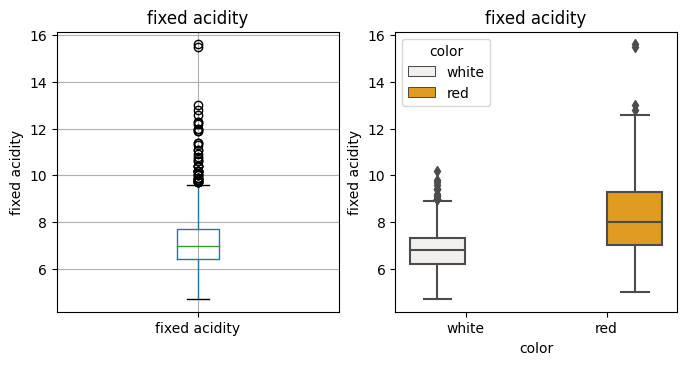

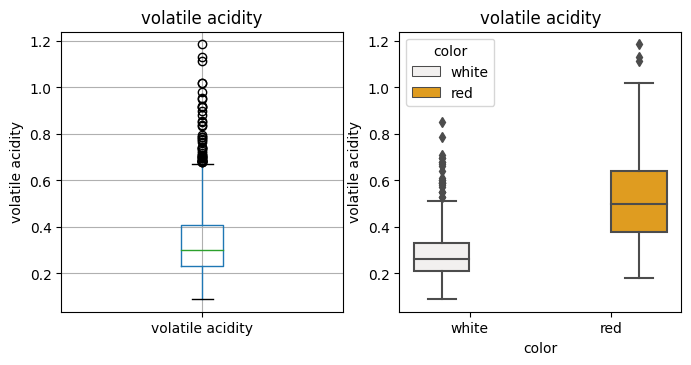

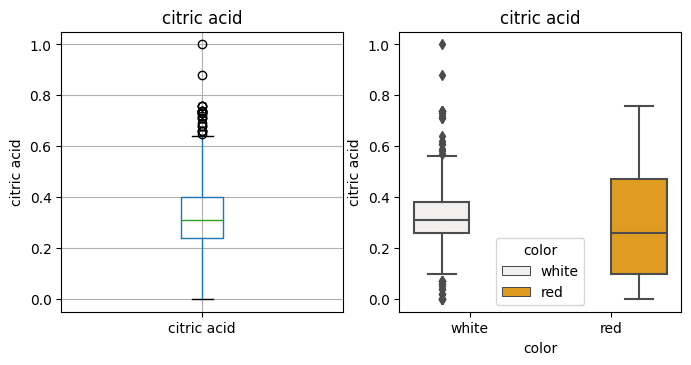

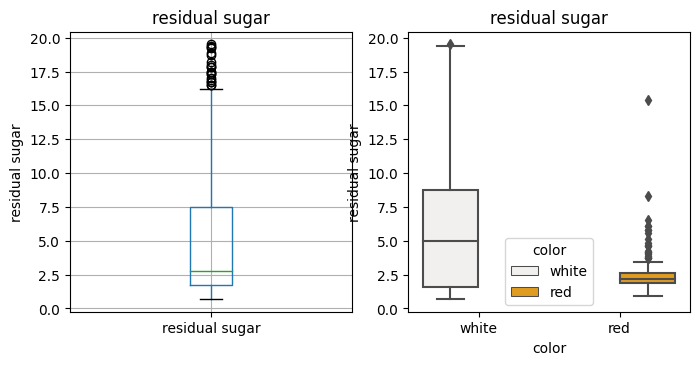

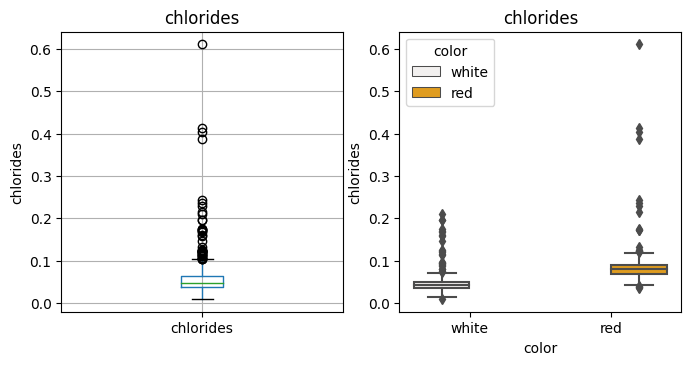

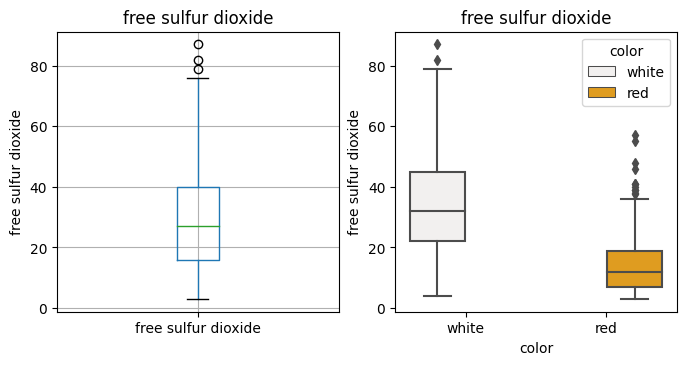

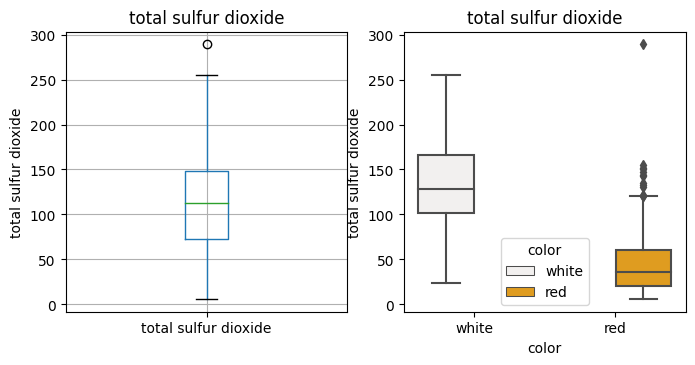

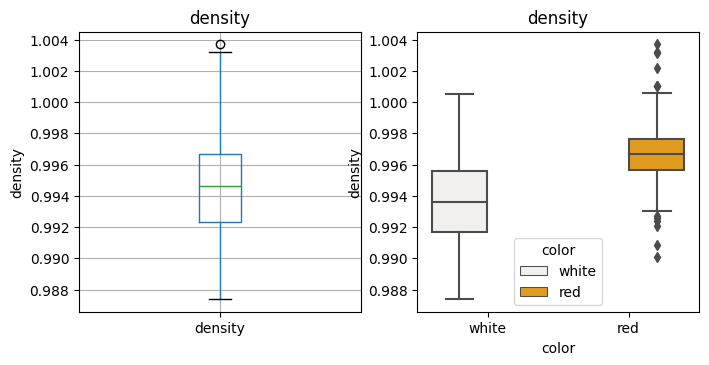

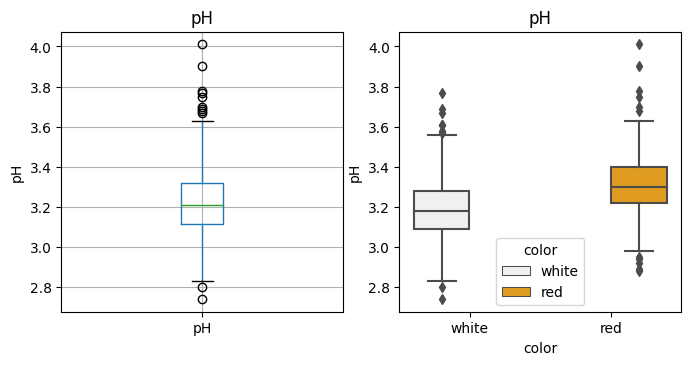

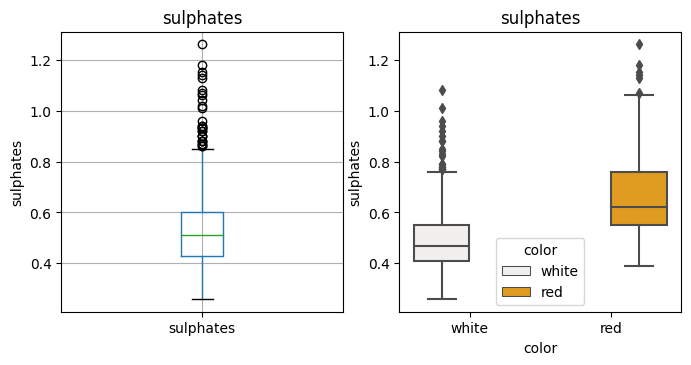

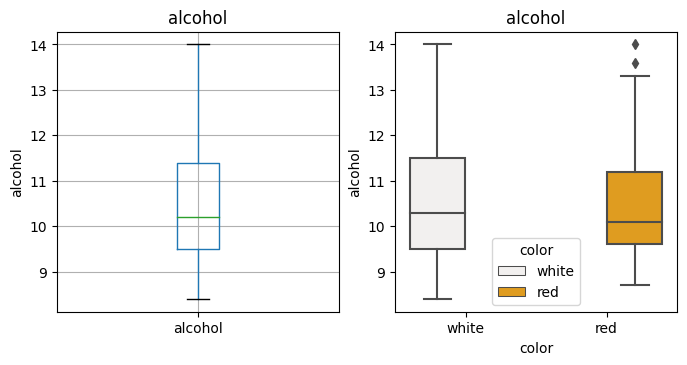

In [321]:
create_boxplots(df_test, continuous_features, 'color')

In [322]:
remove_outliers(df_test, continuous_features)

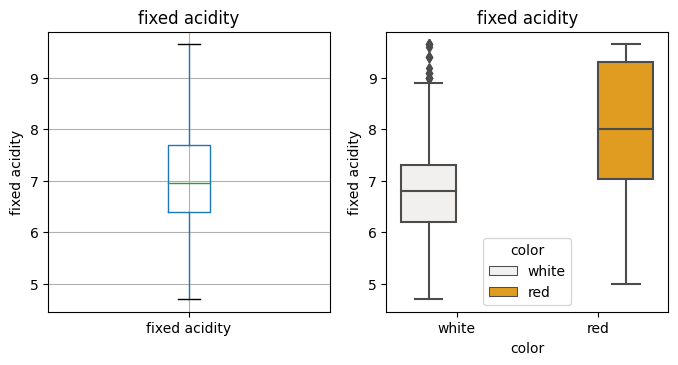

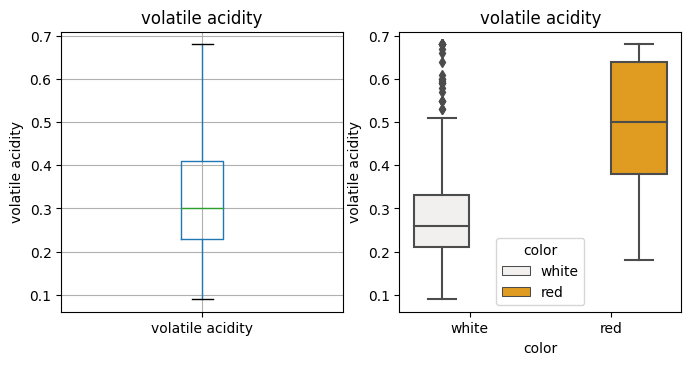

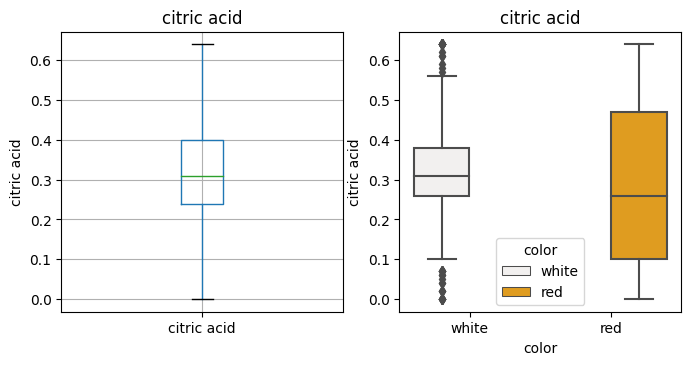

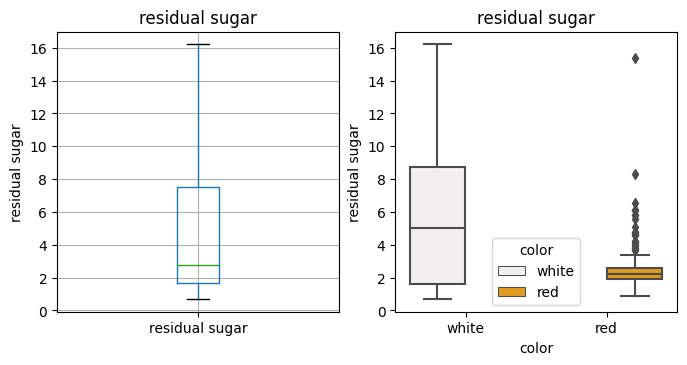

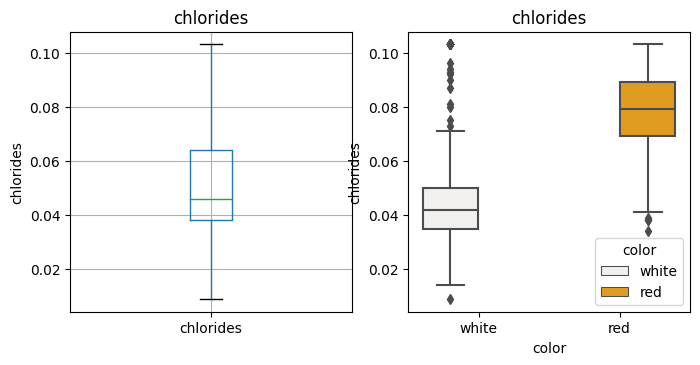

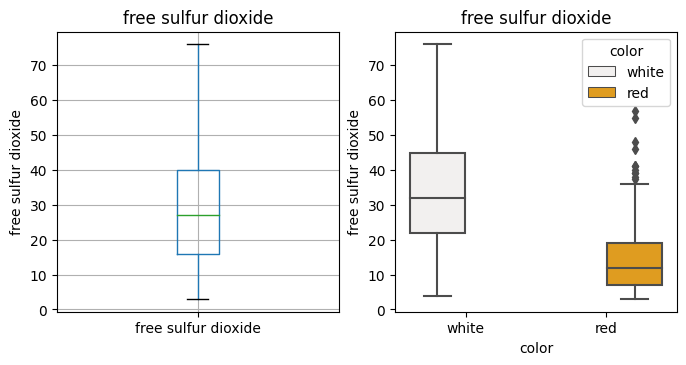

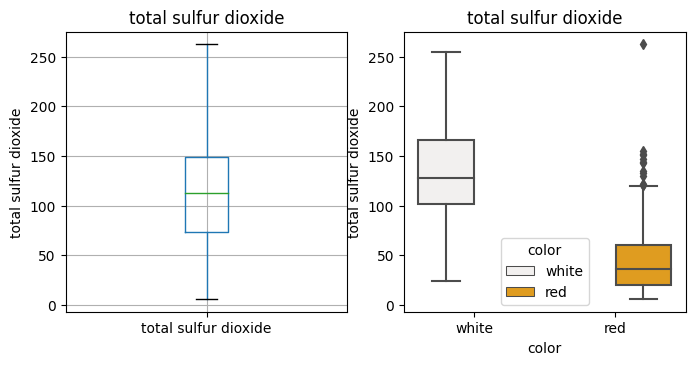

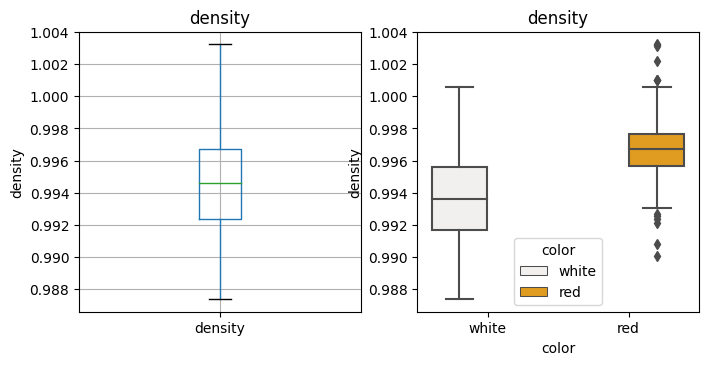

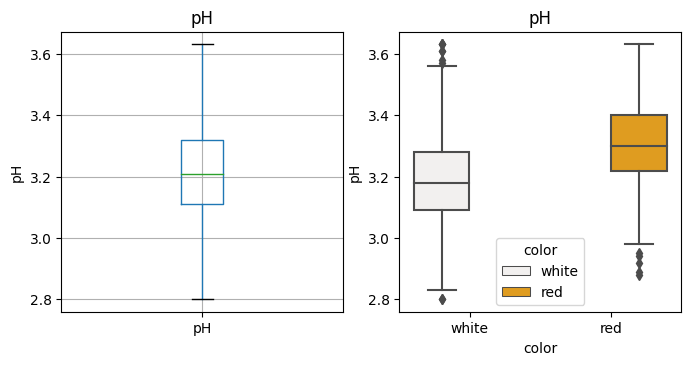

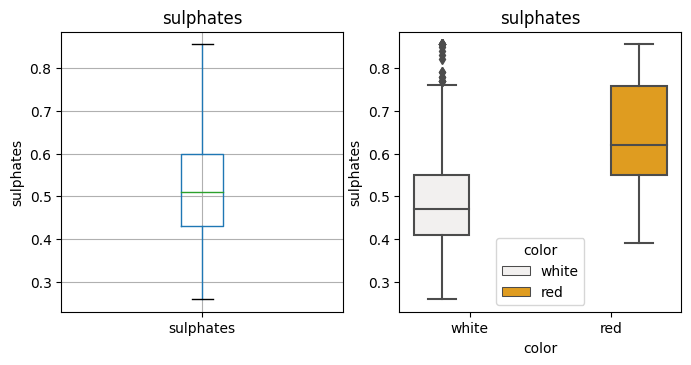

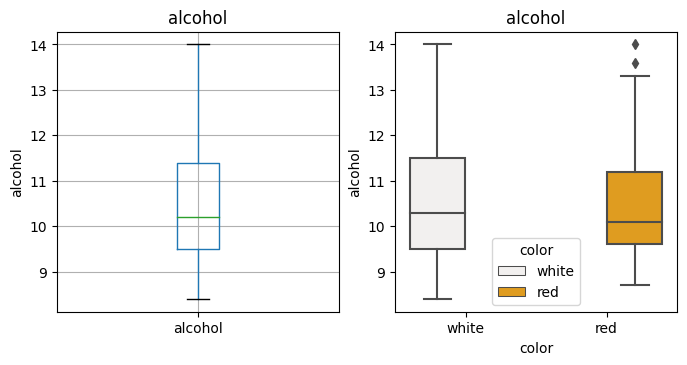

In [323]:
create_boxplots(df_test, continuous_features, 'color')

In [324]:
skewness_score(df_test, continuous_features)

,Feature,Skewness Score
0,fixed acidity,0.561244
1,volatile acidity,0.885039
2,citric acid,-0.000180
3,residual sugar,1.122187
4,chlorides,0.899837
5,free sulfur dioxide,0.486580
6,total sulfur dioxide,0.019466
7,density,0.034694
8,pH,0.229831
9,sulphates,0.680617


In [325]:
df_test = df_test.drop(['pH', 'alcohol', 'quality'], axis = 1)

In [326]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color
0,9.4,0.420,0.32,6.5,0.027,20.0,167.0,0.99479,0.430,white
1,8.6,0.635,0.64,1.8,0.103,19.0,56.0,0.99632,0.855,red
2,5.7,0.680,0.06,6.8,0.042,9.0,84.0,0.99432,0.440,white
3,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,0.570,red
4,7.1,0.170,0.38,7.4,0.052,49.0,182.0,0.99580,0.520,white


In [327]:
print(df_test['color'].value_counts())

white    596
red      202
Name: color, dtype: int64


In [328]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [329]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,9.4,0.420,0.32,6.5,0.027,20.0,167.0,0.99479,0.430,1
1,8.6,0.635,0.64,1.8,0.103,19.0,56.0,0.99632,0.855,0
2,5.7,0.680,0.06,6.8,0.042,9.0,84.0,0.99432,0.440,1
3,8.0,0.570,0.23,3.2,0.073,17.0,119.0,0.99675,0.570,0
4,7.1,0.170,0.38,7.4,0.052,49.0,182.0,0.99580,0.520,1


In [330]:
#Fitting the dataframe X_train onto the MinMax scaler
df_test_continuous_features_transformed = minmax_scaler.transform(df_test)

In [331]:
df_test_continuous_features_transformed

array([[ 7.312856  ,  0.24096564,  0.49166667, ...,  0.49580374,
        -0.16483694,  1.        ],
       [ 6.51040258,  0.64428711,  1.025     , ...,  0.59457715,
         0.83595875,  0.        ],
       [ 3.60150893,  0.72870323,  0.05833333, ...,  0.46546159,
        -0.1412888 ,  1.        ],
       ...,
       [ 4.80518906,  0.12841081,  0.54166667, ...,  0.28986443,
        -0.42386641,  1.        ],
       [ 5.90856251,  0.48483444,  0.24166667, ...,  0.54809555,
        -0.47096268,  1.        ],
       [ 3.90242897, -0.07793971,  0.425     , ...,  0.17366043,
         0.35322201,  1.        ]])

In [332]:
df_test_continuous_features_scaled = pd.DataFrame(df_test_continuous_features_transformed, columns=df_test.columns)

In [333]:
df_test_continuous_features_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,color_white
0,7.312856,0.240966,0.491667,1.771667,-0.426549,2.443741,0.604128,0.495804,-0.164837,1.0
1,6.510403,0.644287,1.025000,0.317300,-0.071565,2.315123,0.187617,0.594577,0.835959,0.0
2,3.601509,0.728703,0.058333,1.864498,-0.356487,1.028944,0.292683,0.465462,-0.141289,1.0
3,5.908563,0.522353,0.341667,0.750516,-0.211690,2.057887,0.424015,0.622337,0.164837,0.0
4,5.005802,-0.228013,0.591667,2.050162,-0.309778,6.173662,0.660413,0.561007,0.047096,1.0


In [350]:
X_train = df_train_continuous_features_scaled.drop(columns=["color_white"], axis=1)
Y_train = df_train_continuous_features_scaled.color_white

In [351]:
X_test = df_test_continuous_features_scaled.drop(columns=["color_white"], axis=1)
Y_test = df_test_continuous_features_scaled.color_white

#### Building a LogisticRegression model

In [352]:
from sklearn.linear_model import LogisticRegression

In [353]:
logmodel = LogisticRegression()

In [354]:
from sklearn.model_selection import cross_val_score

In [355]:
cross_val_scores_logisticRegression = cross_val_score(logmodel, X_train, Y_train, scoring='accuracy', cv = 10)

In [356]:
cross_val_scores_logisticRegression

array([0.98945783, 0.98945783, 0.99096386, 0.98343373, 0.98795181,
       0.98945783, 0.99246988, 0.99246988, 0.98945783, 0.98945783])

In [357]:
logmodel.fit(X_train, Y_train)

LogisticRegression()

In [358]:
predictions = logmodel.predict(X_test)

In [359]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [360]:
from sklearn.metrics import precision_recall_fscore_support as score

In [361]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions)*100))

accuracy score :  93.734335839599


The above score is the accuracy score of the Logistic Regression model

<Axes: >

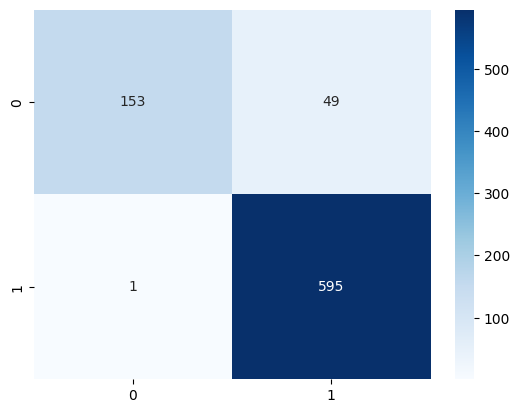

In [362]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot = True, cmap = 'Blues', fmt='0.4g')

In [363]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86       202
         1.0       0.92      1.00      0.96       596

    accuracy                           0.94       798
   macro avg       0.96      0.88      0.91       798
weighted avg       0.94      0.94      0.93       798



In [364]:
precision_lr,recall_lr,fscore_lr,support_lr=score(Y_test, predictions,average='macro')
print('Precision : {}'.format(precision_lr))
print('Recall    : {}'.format(recall_lr))
print('F-score   : {}'.format(fscore_lr))
print('Support   : {}'.format(support_lr))

Precision : 0.9587097684923772
Recall    : 0.8778739451126321
F-score   : 0.9096139905762957
Support   : None


**Recall** score tells how many persons were predicted as having a heart disease amongst the total number of persons actually having a heart disease. Recall is also referred to as True positive rate or sensitivity

**Precision** tells how many persons were actually having a heart disease amongst the total number of persons that were predicted as having a heart disease. Precision is also referred to as positive predictive value.

#### Creating a RandomForestClassifier model

In [365]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [368]:
Y_pred_rfc = classifier.predict(X_test)
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred_rfc)*100))

accuracy score :  75.93984962406014


<Axes: >

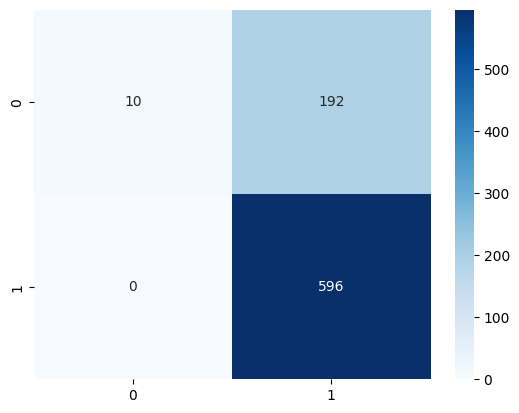

In [369]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_rfc), annot = True, cmap = 'Blues', fmt='0.4g')

In [370]:
print(classification_report(Y_test, Y_pred_rfc))

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09       202
         1.0       0.76      1.00      0.86       596

    accuracy                           0.76       798
   macro avg       0.88      0.52      0.48       798
weighted avg       0.82      0.76      0.67       798



In [371]:
precision_rfc,recall_rfc,fscore_rfc,support_rfc=score(Y_test, Y_pred_rfc,average='macro')
print('Precision : {}'.format(precision_rfc))
print('Recall    : {}'.format(recall_rfc))
print('F-score   : {}'.format(fscore_rfc))
print('Support   : {}'.format(support_rfc))

Precision : 0.8781725888324874
Recall    : 0.5247524752475248
F-score   : 0.4778056494710437
Support   : None


#### Building SVM model

In [376]:
from sklearn import svm

In [377]:
cls = svm.SVC(kernel="linear")

In [378]:
cls.fit(X_train, Y_train)

SVC(kernel='linear')

In [379]:
Y_pred_svm = cls.predict(X_test)

In [380]:
#Y_pred_rfc = classifier.predict(X_test)
print("accuracy score : ", str(accuracy_score(Y_test, Y_pred_svm)*100))

accuracy score :  85.58897243107769


<Axes: >

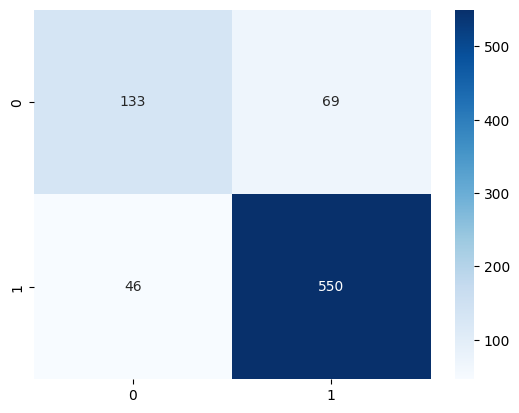

In [381]:
sns.heatmap(confusion_matrix(Y_test, Y_pred_svm), annot = True, cmap = 'Blues', fmt='0.4g')

In [382]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.74      0.66      0.70       202
         1.0       0.89      0.92      0.91       596

    accuracy                           0.86       798
   macro avg       0.82      0.79      0.80       798
weighted avg       0.85      0.86      0.85       798



In [383]:
precision_svm,recall_svm,fscore_svm,support_svm=score(Y_test, Y_pred_svm,average='macro')
print('Precision : {}'.format(precision_svm))
print('Recall    : {}'.format(recall_svm))
print('F-score   : {}'.format(fscore_svm))
print('Support   : {}'.format(support_svm))

Precision : 0.8157733233454572
Recall    : 0.7906173167652335
F-score   : 0.801756261948738
Support   : None


## Formatted table to compare the model

In [384]:
from prettytable import PrettyTable

In [385]:
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "Testing Accuracy", "Precision", "Recall", "F-score", "Support"])

In [386]:
# Adding rows to the table
myTable.add_row(["Logistic Regression", round(accuracy_score(Y_test, predictions)*100, 3), precision_lr, recall_lr, fscore_lr, support_lr])
myTable.add_row(["Random Forest Classifier", round(accuracy_score(Y_test, Y_pred_rfc)*100,3), precision_rfc, recall_rfc, fscore_rfc, support_rfc])
myTable.add_row(["SVM", round(accuracy_score(Y_test, Y_pred_svm)*100,3), precision_svm, recall_svm, fscore_svm, support_svm])

In [387]:
print(myTable)

+--------------------------+------------------+--------------------+--------------------+--------------------+---------+
|        Model Name        | Testing Accuracy |     Precision      |       Recall       |      F-score       | Support |
+--------------------------+------------------+--------------------+--------------------+--------------------+---------+
|   Logistic Regression    |      93.734      | 0.9587097684923772 | 0.8778739451126321 | 0.9096139905762957 |   None  |
| Random Forest Classifier |      75.94       | 0.8781725888324874 | 0.5247524752475248 | 0.4778056494710437 |   None  |
|           SVM            |      85.589      | 0.8157733233454572 | 0.7906173167652335 | 0.801756261948738  |   None  |
+--------------------------+------------------+--------------------+--------------------+--------------------+---------+


### Hyperparameter Tuning

In [388]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [389]:
model = LogisticRegression()

In [390]:
penalty = ['l2']

In [391]:
c_values = [100, 10, 1.0, 0.1, 0.01]

In [392]:
grid = dict(penalty=penalty,C=c_values)

In [393]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [394]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [395]:
grid_result = grid_search.fit(X_train, Y_train)

In [396]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 1.000000 using {'C': 100, 'penalty': 'l2'}


In [397]:
means = grid_result.cv_results_['mean_test_score']

In [398]:
stds = grid_result.cv_results_['std_test_score']

In [399]:
params = grid_result.cv_results_['params']

In [400]:
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2'}
1.000000 (0.000000) with: {'C': 10, 'penalty': 'l2'}
1.000000 (0.000000) with: {'C': 1.0, 'penalty': 'l2'}
1.000000 (0.000000) with: {'C': 0.1, 'penalty': 'l2'}
1.000000 (0.000000) with: {'C': 0.01, 'penalty': 'l2'}


In [401]:
model_bestParams = LogisticRegression(penalty='l2', C=10)

In [402]:
model_bestParams.fit(X_train, Y_train)

LogisticRegression(C=10)

In [403]:
predictions_grid_lr = model_bestParams.predict(X_test)

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions_grid_lr)*100))

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions_grid_lr), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, predictions_grid_lr))

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, random_state = 42, verbose = 2)

In [ ]:
rsc.fit(X_train, Y_train)

In [ ]:
pd.DataFrame(rsc.cv_results_)

In [ ]:
rsc.best_score_*100

In [ ]:
rsc.best_params_

In [ ]:
classifier_RandomForest_BestParams = RandomForestClassifier(n_estimators=rsc.best_params_['n_estimators'], min_samples_split=rsc.best_params_['min_samples_split'], min_samples_leaf=rsc.best_params_['min_samples_leaf'], max_features=rsc.best_params_['max_features'], max_depth=rsc.best_params_['max_depth'])

In [ ]:
classifier_RandomForest_BestParams.fit(X_train, Y_train)

In [ ]:
predictions_rfc_bestParams = classifier_RandomForest_BestParams.predict(df_test_continuous_features_scaled)

In [ ]:
print("accuracy score : ", str(accuracy_score(Y_test, predictions_rfc_bestParams)*100))

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions_rfc_bestParams), annot = True, cmap = 'Blues', fmt='0.4g')

In [ ]:
print(classification_report(Y_test, predictions_rfc_bestParams))